# Predicciones finales

### Descargar dataset

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import importlib
import sys
import torch.nn as nn
import torch.optim as optim
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [39]:
import aux_test as aux_t
sys.path.append('../src_data')  # Reemplaza con la ruta real

import basic_preprocessing as bp
import auxiliares_data as aux_d
import crear_dataset as cd
import crear_dataset2 as cd2
import crear_dataset_3 as cd3

In [ ]:
importlib.reload(bp)
BASE_DIR = os.getcwd()

path_test = os.path.join(BASE_DIR, 'test_data_bicis.csv')
path_users = os.path.join(BASE_DIR, '..', 'data','clean', 'usuarios_ecobici.csv')

df_test, eliminated = bp.limpiar_recorrido_individual(path_test)
# read
# df_test = pd.read_csv(path_test)
df_users = pd.read_csv(path_users)

C:\Users\felic\AppData\Local\Temp\ipykernel_6196\792303276.py:10: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_users = pd.read_csv(path_users)


In [ ]:
importlib.reload(bp)
df_unificado = bp.unificar_datasets(df_test, df_users)

Estadísticas del merge:
Total recorridos: 12633
Recorridos con información de usuario: 7884
Recorridos sin información de usuario: 4749
Porcentaje de match: 62.41%


Ya creamos el limpio, ahora vamos a crear la features 3.

In [34]:
importlib.reload(cd3)
dataset_test, estaciones = cd3.crear_dataset_f3(df_unificado, estaciones_globales=None)

# guardamos en csv
dataset_test.to_csv(os.path.join(BASE_DIR, 'dataset_f3.csv'), index=False)

🚀 Iniciando creación de dataset unificado...
📅 Convirtiendo fechas...
🏪 Encontradas 370 estaciones únicas en este dataset
🏪 Encontradas 370 estaciones únicas
⏰ Rango temporal: 2024-09-09 00:00:00 a 2024-09-11 10:00:00 (59 horas)
📊 Dataset final tendrá ~59 filas × 754 columnas
🏗️ Creando estructura base...
🌍 Procesando features globales de salidas...
🚉 Procesando salidas por estación...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:29: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:46: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:47: FutureWarning: 'H' is deprecated and will be removed in a 

🎯 Creando variables target...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[f'target_estacion_{est}'] = dataset_temp[est].shift(-1)
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[f'target_estacion_{est}'] = dataset_temp[est].shift(-1)
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../sr

🧹 Limpieza final...
✅ Dataset creado: 58 filas × 754 columnas
📊 Desglose de columnas:
   • Temporales: 6
   • Globales: 8
   • Cantidad por estación: 370
   • Estadísticas por estación: 2590
   • Targets: 370
   • Total esperado: 3344
📈 Memoria aproximada: 0.3 MB

📋 Primeras 3 filas del dataset:
           fecha_hora  hora  dia_semana  total_bicis_salieron_global  bicis_salieron_estacion_2  target_estacion_2
0 2024-09-09 00:00:00     0           0                        139.0                        0.0                0.0
1 2024-09-09 01:00:00     1           0                        102.0                        0.0                4.0
2 2024-09-09 02:00:00     2           0                         45.0                        0.0                0.0


features 3 para entrenar

In [36]:
df_train_path = os.path.join(BASE_DIR, '..', 'data', 'clean', 'unificado_23_24.csv')
df_train = pd.read_csv(df_train_path)

# ponemos en formato features 3
dataset_train, estaciones = cd3.crear_dataset_f3(df_train, estaciones_globales=estaciones)
# guardamos en csv
dataset_train.to_csv(os.path.join(BASE_DIR, 'dataset_f3_train.csv'), index=False)

C:\Users\felic\AppData\Local\Temp\ipykernel_6196\3396742502.py:2: DtypeWarning: Columns (1,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(df_train_path)


🚀 Iniciando creación de dataset unificado...
📅 Convirtiendo fechas...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:29: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:46: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')


🏪 Usando 370 estaciones predefinidas
🏪 Encontradas 370 estaciones únicas
⏰ Rango temporal: 2022-12-19 01:00:00 a 2024-09-14 16:00:00 (15,256 horas)
📊 Dataset final tendrá ~15,256 filas × 754 columnas
🏗️ Creando estructura base...
🌍 Procesando features globales de salidas...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:47: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_recorrido'].max().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:48: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  horas_completas = pd.date_range(start=fecha_min, end=fecha_max, freq='H')


🚉 Procesando salidas por estación...
🎯 Creando variables target...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[f'target_estacion_{est}'] = dataset_temp[est].shift(-1)
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../src_data\crear_dataset_3.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[f'target_estacion_{est}'] = dataset_temp[est].shift(-1)
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\predicciones\../sr

🧹 Limpieza final...
✅ Dataset creado: 15,255 filas × 765 columnas
📊 Desglose de columnas:
   • Temporales: 6
   • Globales: 8
   • Cantidad por estación: 370
   • Estadísticas por estación: 2590
   • Targets: 370
   • Total esperado: 3344
📈 Memoria aproximada: 88.7 MB

📋 Primeras 3 filas del dataset:
           fecha_hora  hora  dia_semana  total_bicis_salieron_global  bicis_salieron_estacion_2  target_estacion_2
0 2022-12-19 01:00:00     1           0                          1.0                        0.0                0.0
1 2022-12-19 02:00:00     2           0                          0.0                        0.0                0.0
2 2022-12-19 03:00:00     3           0                          0.0                        0.0                0.0


In [45]:
df_test_path = os.path.join(BASE_DIR, 'dataset_f3.csv')
dataset_test = pd.read_csv(df_test_path)

### Entrenamos el modelo

In [46]:
importlib.reload(aux_t)

print("type dataset_train: ", type(dataset_train))
print("type dataset_test: ", type(dataset_test))
(y_train_array_fixed, X_train_clean_fixed, y_test_array_fixed, X_test_clean_fixed, target_columns_sorted_test, columnas_eliminadas) = aux_t.equiparar_columnas(dataset_train, dataset_test)
print("eliminadas: ", len(columnas_eliminadas))
class NeuralNetworkGrande(nn.Module):
    def __init__(self, input_size, output_size, dropout_rate=0.3):
        super(NeuralNetworkGrande, self).__init__()
        
        # Arquitectura Grande: [600, 500, 400, 300, output_size]
        self.layers = nn.ModuleList()
        self.dropouts = nn.ModuleList()
        
        # Definir las capas según la arquitectura exacta
        layer_sizes = [input_size, 600, 500, 400, 300, output_size]
        
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            # Agregar dropout solo en capas ocultas (no en la última)
            if i < len(layer_sizes) - 2:
                self.dropouts.append(nn.Dropout(dropout_rate))
        
        self.loss_fn = nn.MSELoss()
    
    def forward(self, x):
        # Pasar por todas las capas excepto la última
        for i, layer in enumerate(self.layers[:-1]):
            x = torch.relu(layer(x))  # ReLU en capas ocultas
            x = self.dropouts[i](x)   # Dropout después de ReLU
        
        # Última capa sin activación (regresión)
        x = self.layers[-1](x)
        return x

# Aplicar StandardScaler (preprocesamiento requerido)
print("📊 Aplicando StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean_fixed)
X_test_scaled = scaler.transform(X_test_clean_fixed)

# Convertir a tensores de PyTorch con datos escalados
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_array_fixed)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_array_fixed)

# Crear DataLoaders con batch_size específico
batch_size = 128  # Cambiado de 64 a 128
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Configurar modelo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🖥️ Usando dispositivo: {device}")

input_size = X_train_tensor.shape[1]
output_size = y_train_tensor.shape[1]

print(f"🏗️ Arquitectura: {input_size} -> 600 -> 500 -> 400 -> 300 -> {output_size}")
print(f"💧 Dropout: 0.3")

# Crear modelo con arquitectura específica
model = NeuralNetworkGrande(input_size, output_size, dropout_rate=0.3).to(device)

# Optimizador específico: Adam con lr=0.001 (sin weight_decay para mantener identidad)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Configuración de entrenamiento específica
num_epochs = 30  # Cambiado de 200 a 30
train_losses = []
test_losses = []

print(f"\n🚀 Iniciando entrenamiento por {num_epochs} épocas...")
print(f"📦 Batch size: {batch_size}")
print(f"📈 Learning rate: 0.001")

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    num_batches = 0
    
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = model.loss_fn(outputs, batch_y)  # MSELoss específico
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        num_batches += 1
    
    avg_train_loss = train_loss / num_batches
    
    # Validation
    model.eval()
    test_loss = 0.0
    num_test_batches = 0
    
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = model.loss_fn(outputs, batch_y)
            test_loss += loss.item()
            num_test_batches += 1
    
    avg_test_loss = test_loss / num_test_batches
    
    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)
    
    # Print progress cada 5 épocas (ya que son solo 30)
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Época [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_test_loss:.6f}")

print(f"\n✅ Entrenamiento completado!")
print(f"📈 Val loss final: {test_losses[-1]:.6f}")

# Predicciones finales
print("\n🔮 Generando predicciones finales...")
model.eval()
with torch.no_grad():
    X_test_device = X_test_tensor.to(device)
    predictions_pytorch = model(X_test_device).cpu().numpy()
    
    # Aplicar clipping específico: np.clip(pred, 0, None)
    predictions_pytorch = np.clip(predictions_pytorch, 0, None)
    
    # Hacer que las predicciones sean números enteros redondeando
    predictions_pytorch = np.round(predictions_pytorch).astype(int)

# Calcular métricas finales
mae = mean_absolute_error(y_test_array_fixed, predictions_pytorch)
r2 = r2_score(y_test_array_fixed, predictions_pytorch)
rmse = np.sqrt(mean_squared_error(y_test_array_fixed, predictions_pytorch))

print(f"\n🏆 Métricas finales modelo óptimo:")
print(f"   MAE: {mae:.4f}")
print(f"   R²: {r2:.4f}")
print(f"   RMSE: {rmse:.4f}")
print(f"   Val Loss final: {test_losses[-1]:.6f}")

type dataset_train:  <class 'pandas.core.frame.DataFrame'>
type dataset_test:  <class 'pandas.core.frame.DataFrame'>
🔄 Sincronizando columnas entre train y val...
📊 Features - Train: 395, Val: 384
🎯 Targets - Train: 370, Val: 370
❌ Features solo en train (serán eliminadas): 11
❌ Targets solo en train (serán eliminadas): 0
❌ Features solo en val/test (serán eliminadas): 0
❌ Targets solo en val/test (serán eliminadas): 0
❌ Features faltantes en val: 11
❌ Targets faltantes en val: 0

🗑️ Features eliminadas de TRAIN:
   1. 151
   2. 205
   3. 23
   4. 233
   5. 30
   6. 31
   7. 459
   8. 485
   9. 51
   10. 523
   11. 95

✅ Train sincronizado - Shape: (15255, 754)
✅ Val sincronizado - Shape: (7, 754)
✅ Columnas coinciden: True

🎯 X_train_fixed shape: (15255, 384)
🎯 y_train_fixed shape: (15255, 370)
🎯 X_val_fixed shape: (7, 384)
🎯 y_val_fixed shape: (7, 370)

🔮 Preparando datos sincronizados...

📊 Verificando dimensiones finales:
   • X_train shape: (15255, 383)
   • X_val shape: (7, 383)


In [49]:
print("Las predicciones finales son: ", predictions_pytorch)
# Guardar las predicciones finales en un CSV
predictions_df = pd.DataFrame(predictions_pytorch, columns=target_columns_sorted_test)

predictions_df.to_csv(os.path.join(BASE_DIR, 'predicciones_finales.csv'), index=False)

print("Todas las estaciones no presentes predicen 0 porque eran en su mayoría 0. No se utilizaron para el entrenamiento porque tenían muy pocos viajes.")

Las predicciones finales son:  [[4 4 7 ... 0 0 0]
 [4 3 6 ... 0 0 0]
 [5 4 7 ... 0 0 0]
 ...
 [3 3 5 ... 0 0 0]
 [2 5 5 ... 0 0 0]
 [2 4 5 ... 0 0 0]]
Todas las estaciones no presentes predicen 0 porque eran en su mayoría 0. No se utilizaron para el entrenamiento porque tenían muy pocos viajes.


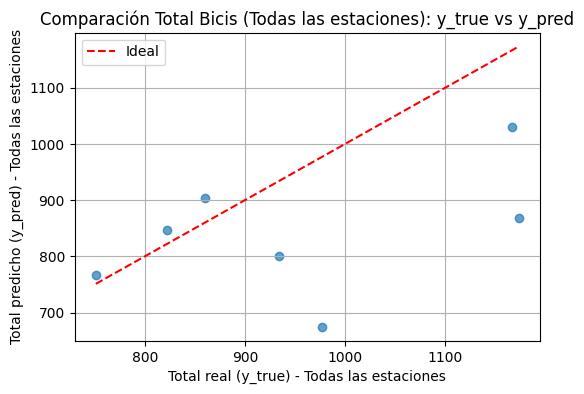

In [52]:
import numpy as np

import matplotlib.pyplot as plt

# Calculamos el promedio por fila para comparar el total de bicis predichas vs reales por muestra (todas las estaciones)
y_true_sum = y_test_array_fixed.sum(axis=1)
y_pred_sum = predictions_pytorch.sum(axis=1)

plt.figure(figsize=(6, 4))
plt.scatter(y_true_sum, y_pred_sum, alpha=0.7)
plt.plot([y_true_sum.min(), y_true_sum.max()], [y_true_sum.min(), y_true_sum.max()], 'r--', label='Ideal')
plt.xlabel('Total real (y_true) - Todas las estaciones')
plt.ylabel('Total predicho (y_pred) - Todas las estaciones')
plt.title('Comparación Total Bicis (Todas las estaciones): y_true vs y_pred')
plt.legend()
plt.grid(True)
plt.show()